<h1>**Image processing**</h1>

In [0]:
#importing helper library

import matplotlib.pyplot as plt
import numpy as np

In [0]:
#importing all image  datasets from keras
from keras.datasets import mnist
from keras.datasets import cifar10
from keras.datasets import fashion_mnist


Using TensorFlow backend.


In [0]:
# importing helper and preprocessing libraries form keras

from keras.preprocessing.image import ImageDataGenerator



In [0]:
#loading all datasets

(mnist_train, mnist_train_label), (mnist_test, mnist_test_label) = mnist.load_data()
(cifar10_train,cifar10_train_label),(cifar10_test,cifar10_test_label) = cifar10.load_data()
(fashion_train,fashion_train_label),(fashion_test,fashion_test_label) = fashion_mnist.load_data()



4423680/4422102 [==============================] - 1s 0us/step


In [0]:
def printer(str):
    print(str)

printer(mnist_train.shape)
printer(cifar10_train.shape)
printer(fashion_train.shape)




(60000, 28, 28)
(50000, 32, 32, 3)
(60000, 28, 28)


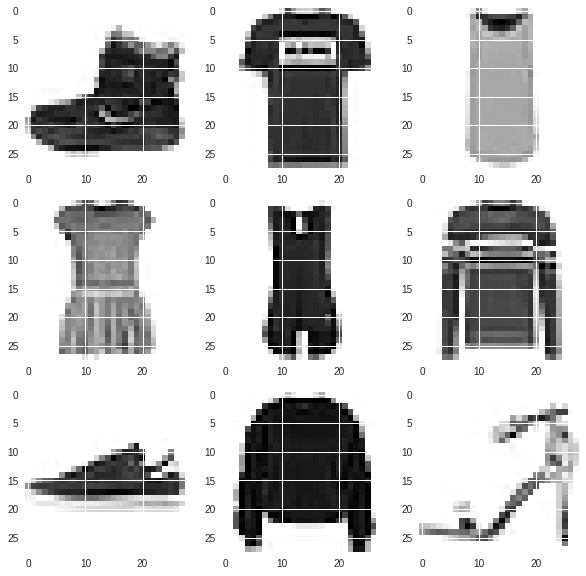

In [0]:
#visualzation images
def visualizer(imgs , figs = (15,15) ,c = None):
    _,a = plt.subplots(3,3,figsize = figs) 
    
    for i,j in enumerate(a.flat):
        j.imshow(imgs[i],cmap = c)
        
  

#visualizer(mnist_train[0:16], (5,5) , c='gray' )  
visualizer(fashion_train[0:16],(10,10),'binary')
#visualizer(cifar10_train[0:16])


<h3>ImageDataGenerator class</h3>

Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).


 To use datagenerator use the following 3 methods 
 
 datagen = ImageDataGenerator(
 
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=epochs)









In [0]:
#image preprocessing 


datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(fashion_train.reshape(60000,28,28,1))

# fits the model on batches with real-time data augmentation:
it = datagen.flow(fashion_train.reshape(60000,28,28,1),fashion_train_label,batch_size = 16)


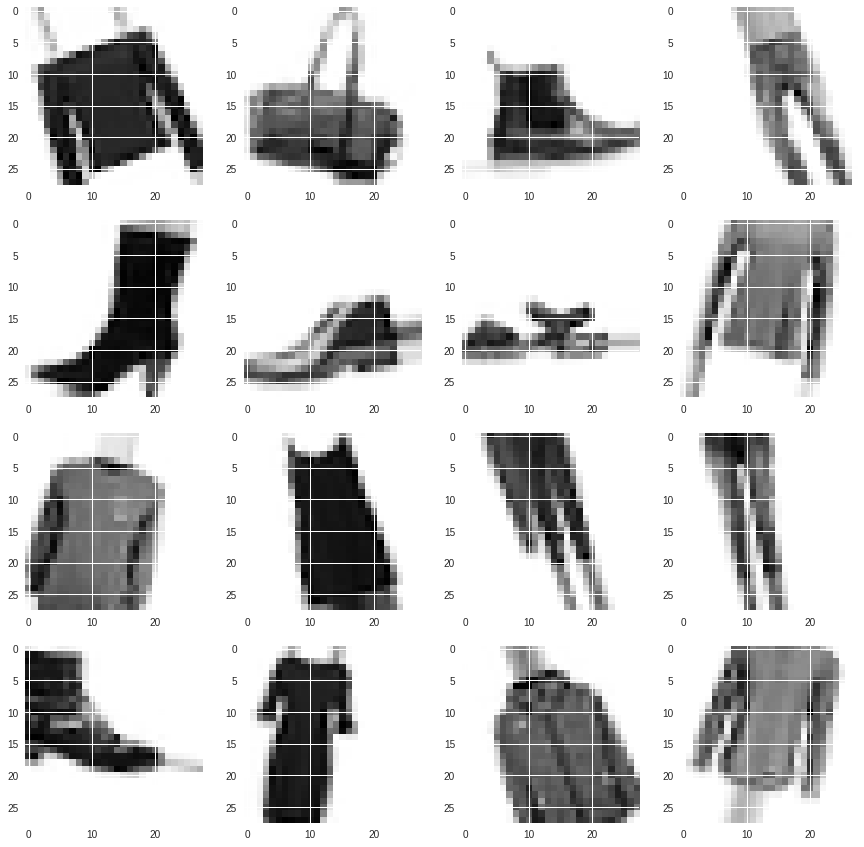

In [0]:
data = np.array(next(it)[0])
#it.next()

visualizer(data.reshape(16,28,28))

In [0]:
cifar10gen = ImageDataGenerator(
     rotation_range = 20,
     width_shift_range = 0.2,
     height_shift_range = 0.2,
     horizontal_flip = True)

cifar10gen.fit(cifar10_train)

iterator = cifar10gen.flow(cifar10_train,cifar10_train_label,batch_size = 16)
    



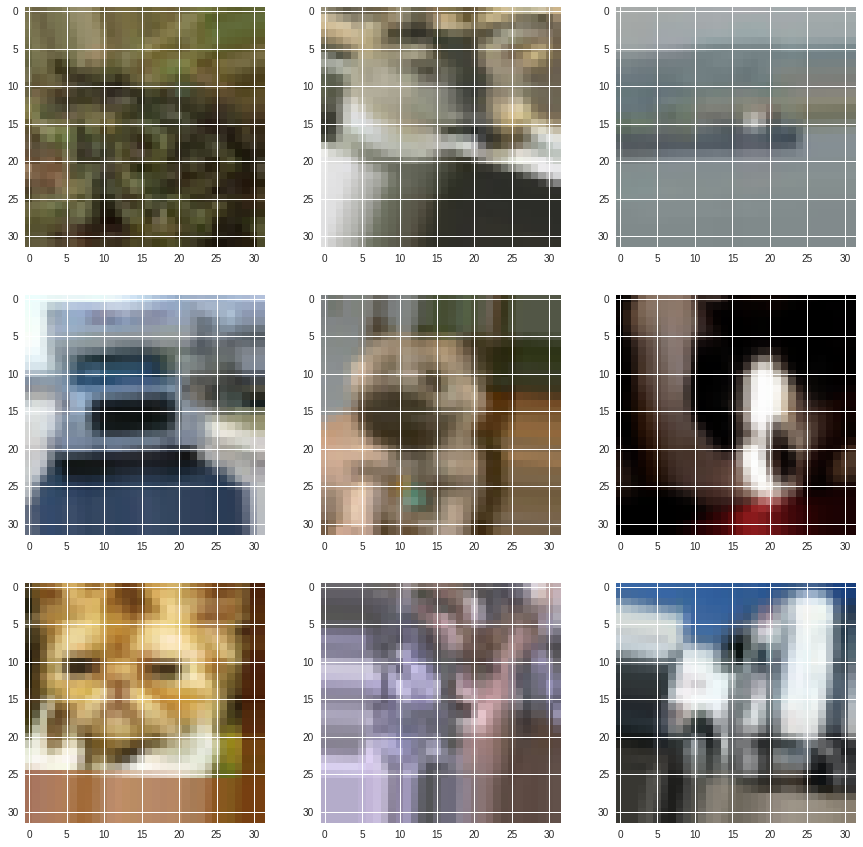

In [0]:
data = np.array(next(iterator)[0],dtype = 'uint8')

data.shape


visualizer(data)


SEQUENCE PROCESING 

In [0]:
#importing tt data

# note- imdb movies for sentimental classification

from keras.datasets import imdb
from keras.datasets import reuters
from keras.datasets import boston_housing



In [0]:
(imdb_train,imdb_train_label),(imdb_test,imdb_test_label) = imdb.load_data(path = "imdb.npz",
                                                                           num_words = None,
                                                                           skip_top = 0, 
                                                                           maxlen=None,
                                                                           seed=113,
                                                                           start_char=1,
                                                                           oov_char=2,
                                                                           index_from=3)

17465344/17464789 [==============================] - 4s 0us/step


In [0]:
#importing preprocessing 
seq = [[1,2,3,4,5,6,7,8,9,10,21,12,13,14]]

s = '''this this This /'' class allows to vectorize a text corpus, 
     by turning each text into either a sequence of 
  '''

from keras.preprocessing.sequence import TimeseriesGenerator
from keras.preprocessing.sequence import pad_sequences

pad_sequences(seq, 
              maxlen=None, 
              dtype = 'int32' ,
              padding='post', 
              truncating='pre', 
              value=0)




array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 21, 12, 13, 14]],
      dtype=int32)

In [0]:
from keras.preprocessing.sequence import skipgrams

In [0]:
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing.sequence import make_sampling_table




content,label =  skipgrams([1,2,3,4], 
                           vocabulary_size = 4 ,
                           window_size=1, 
                           negative_samples=1.0,  
                           categorical=False, 
                           sampling_table=None, 
                           seed=None)
print(content)
print(label)

[[3, 3], [4, 3], [2, 2], [2, 1], [2, 3], [3, 2], [1, 2], [3, 2], [1, 2], [4, 3], [3, 4], [2, 3]]
[0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1]


In [0]:
'''
''''''The make_sampling_table() operation creates a 
table that skipgrams uses to ensure it produces
negative samples in a balanced manner and not just 
the most common words.  The skipgrams operation by default
selects the same amount of
negative samples as it does true context words.

'''
make_sampling_table(14, sampling_factor=1e-05)

array([0.00315225, 0.00315225, 0.00547597, 0.00741556, 0.00912817,
       0.01068435, 0.01212381, 0.01347162, 0.01474487, 0.0159558 ,
       0.0171136 , 0.01822533, 0.01929662, 0.02033198])

In [0]:
from keras.preprocessing.text import text_to_word_sequence

a = text_to_word_sequence(s, 
                      filters='!"#$%&()\'*+,-./:;<=>?@[\]^_`{|}~\n'
                      , lower=True, split=' ')
a

['this',
 'this',
 'this',
 'class',
 'allows',
 'to',
 'vectorize',
 'a',
 'text',
 'corpus',
 'by',
 'turning',
 'each',
 'text',
 'into',
 'either',
 'a',
 'sequence',
 'of']

In [0]:
from  keras.preprocessing.text import one_hot
one_hot(s,n= len(set(a)) 
        , filters='!"#$%&()*+,-./:;\'<=>?@[\]^_`{|}~\n',
        lower=True, 
        split=' ')

[4, 4, 4, 10, 4, 10, 8, 7, 4, 2, 4, 2, 1, 4, 8, 13, 7, 1, 7]

In [0]:
#Text Preprocessing


from keras.preprocessing.text import Tokenizer

token = Tokenizer(
          num_words=37,
          filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', 
          lower=True, 
          split=' ', 
          char_level=False, 
          oov_token=None, document_count=1)

# oov stands for out of vocublary words or <ukn>


print(token.fit_on_texts([s]))


None


#Keras.Utils

In [0]:
# to categorical()


from keras.utils import to_categorical
cat_mnist_train_data = to_categorical(mnist_train_label,num_classes = 10)


cat_mnist_train_data[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [0]:
#normalize 
from keras.utils import normalize


print(mnist_train[0][0:5][0:5])


normalize(mnist_train[0][0:5][0:5])



[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])